<a href="https://colab.research.google.com/github/APstats-labs/labs/blob/main/SA_C4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data pre-processing methods (2)

General requirements

In [1]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## PCA - Principal Component Analysis

A brief and, I believe, informative description of PCA is provided here, along with a comparison to a closely related method, factor analysis: https://stats.stackexchange.com/questions/102882/steps-done-in-factor-analysis-compared-to-steps-done-in-pca/102999#102999

A good introductory video on the topic (which also provides the data source) can be found here: https://www.youtube.com/watch?v=FD4DeN81ODY&t=1s&ab_channel=VisuallyExplained

### Preparing the data




Loading CSV file from drive and displaying its contents.

In [2]:
Dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Statistics/Curs/Data_c2/world-happiness-report-2021.csv')

Remove all columns except those of interest and check for missing (NA) values.

In [3]:
Dataset_cleaned = pd.concat([Dataset.iloc[:, 0], Dataset.iloc[:, 6:12]], axis=1)

In [4]:
Dataset_cleaned.isnull().values.any()

False

In [5]:
display(Dataset_cleaned.head().style.set_table_styles([{
    'selector': 'th',
    'props': [('background-color', 'lightgrey')]
}]))

,Country name,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,Finland,10.775000,0.954000,72.000000,0.949000,-0.098000,0.186000
1,Denmark,10.933000,0.954000,72.700000,0.946000,0.030000,0.179000
2,Switzerland,11.117000,0.942000,74.400000,0.919000,0.025000,0.292000
3,Iceland,10.878000,0.983000,73.000000,0.955000,0.160000,0.673000
4,Netherlands,10.932000,0.942000,72.400000,0.913000,0.175000,0.338000


In [6]:
Dataset_cleaned.shape

(149, 7)

### PCA without standardization

A new dataset is created using PCA. The "Projections_PCSCORES" has only 3 columns (variables) due to setting n_components=3. These columns represent the principal components extracted from the original dataset.

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
Projections_PCSCORES=pca.fit_transform(Dataset_cleaned.iloc[:, 1:])
Projections_PCSCORES.shape

(149, 3)

In [ ]:
Projections_PCSCORES[:10] #only the first 10 rows are displayed;

array([[ 7.13567781,  0.31317594, -0.37788576],
       [ 7.85075884,  0.36187922, -0.44511125],
       [ 9.55766921,  0.28981564, -0.33137884],
       [ 8.13461729,  0.25301148, -0.11423561],
       [ 7.55146362,  0.39682667, -0.3873468 ],
       [ 8.46078745,  0.3884553 , -0.40391204],
       [ 7.84006425,  0.29282371, -0.42800461],
       [ 7.85402446,  1.07614706, -0.23528112],
       [ 8.49933053, -0.03230585, -0.43971221],
       [ 8.43673468,  0.23962313, -0.19341311]])

#### Explanatories (optional)

❗ PCA can be performed using the Eigenvalue Decomposition (EVD) of the covariance matrix (COV) or using Singular Value Decomposition (SVD). The sklearn implementation uses SVD. Below, it will be illustrated that these methods are equivalent. Moreover, this also provides an opportunity to look "under the hood" at the PCA attributes after fitting it to the data.

▶ Let us start with the **eigenvector matrix**, which consists of vectors extracted from the covariance (COV) matrix. These vectors do not change direction when multiplied by the COV matrix.

Eigenvectors can also be referred to as principal directions or principal components. Note that the term "principal component" is sometimes also used to describe the projection scores (which will be introduced below).

Algebraically, this matrix represents the orthogonal transformation embedded in the covariance matrix. In this view, a matrix is a transformation of space (if this sounds strange, check this: https://www.youtube.com/watch?v=kYB8IZa5AuE&list=PLZHQObOWTQDPD3MizzM2xVFitgF8hE_ab&index=3&ab_channel=3Blue1Brown)

In the EVD decomposition of the covariance matrix (COV=VDVt), this is the matrix V which contains the eigenvectors. Its transpose (Vt) can take any vector from any basis into the basis defined by the eigenvectors. Consequently, the transpose of the transpose, meaning V itsel, can take the same vector from the eigenvector basis back to the original basis.

This matrix encodes the transformation through which, if applied to the original data, the variables would become decoupled and independent.

Statistically, these eigenvectors are orthogonal vectors in the Cartesian space defined by the six variables. I belive that their coordinates also have a cosine interpretation in the subject space, but this requires further investigation.

In the SVD approach, the equivalent is extracted from the matrix of Right Singular Vectors.

In [ ]:
pca.components_.T #notice that these were transposed for a more intuitive reading, so it is the transpose of the matrix

array([[ 1.46751436e-01,  9.86427550e-01,  3.21978801e-04],
       [ 1.22234623e-02,  6.16094491e-02,  1.82716779e-02],
       [ 9.89015255e-01, -1.47502641e-01,  7.62692570e-03],
       [ 7.66719956e-03,  1.28312205e-02, -2.58084237e-01],
       [-3.59697672e-03, -3.10818920e-02, -5.29163510e-01],
       [-9.57626261e-03, -1.66496678e-02,  8.08075726e-01]])

Compare the matrix above, obtained from SVD, with the eigenvectors derived directly from the covariance matrix below.

In the sklearn implementation above, n_components was set to 3, meaning the first three eigenvectors (ordered by the magnitude of their corresponding eigenvalues) were selected. Eigenvalues will be presented later (these are the D's in the VDVt).

Below, all the unsorted eigenvectors are displayed. The first, second, and last correspond to the largest eigenvalues.

📔 Note: The sign does not matter when considering the equivalence of eigenvectors: (Read more here: https://stats.stackexchange.com/questions/205713/does-the-sign-of-eigenvectors-matter)

In [ ]:
cov = np.cov(Dataset_cleaned.iloc[:, 1:].T)
eig_val, eig_vec = np.linalg.eig(cov)
print(eig_vec.T)

[[-1.46751436e-01 -1.22234623e-02 -9.89015255e-01 -7.66719956e-03
   3.59697672e-03  9.57626261e-03]
 [ 9.86427550e-01  6.16094491e-02 -1.47502641e-01  1.28312205e-02
  -3.10818920e-02 -1.66496678e-02]
 [-5.52262987e-02  9.21844657e-01 -1.67383817e-03 -3.59940853e-01
   4.91728366e-03 -1.32544650e-01]
 [ 4.15510566e-02 -3.59621456e-01  5.16921522e-03 -8.87118581e-01
   2.68401143e-01 -9.95019960e-02]
 [-2.54591244e-02 -1.28824862e-01 -2.02591709e-03 -1.28966297e-01
  -8.04328045e-01 -5.64956612e-01]
 [ 3.21978801e-04  1.82716779e-02  7.62692570e-03 -2.58084237e-01
  -5.29163510e-01  8.08075726e-01]]


▶ Next is the **eigenvalues matrix**, a diagonal matrix of values extracted from the covariance (COV) matrix.

Algebraically, the eigenvalue matrix represents the diagonal transformation embedded in the COV matrix. In the decomposition COV=VDVt, this is the D matrix which contains the eigenvalues. It scales any vector in the eigenvector basis to the magnitudes embedded in the COV matrix.

Statistically, it represents how much variance of the variables in the dataset is captured by each eigenvector. In other words, it measures the average squared distance from the origin of the data points projected onto the eigenvector.

In the SVD approach, the eigenvalues correspond to the singular values, which are the square roots of the eigenvalues (multiplied by n-1). Singular values represent the total distance of the data points from the origin when projected onto the eigenvector.

Below, only the diagonal values of the matrix are extracted

In [ ]:
print(pca.explained_variance_)

[4.67389074e+01 3.45052292e-01 3.33340775e-02]


Compare the eigenvalues of the three eigenvectors automatically selected by sklearn with the eigenvalues of all the eigenvectors extracted directly from the COV matrix. As seen below, the first, second, and last eigenvalues match those of the selected eigenvectors. This is why the first, second, and last eigenvectors were automatically selected in SVD.

📔Note that "4.05272218e-03" is smaller than "3.33340775e-02" because the e-03 means 0.00405272218 whereas e-03 means 0.0333340775.

In [ ]:
cov = np.cov(Dataset_cleaned.iloc[:, 1:].T)
eig_val, eig_vec = np.linalg.eig(cov)
print(eig_val)

[4.67389074e+01 3.45052292e-01 4.05272218e-03 8.88377229e-03
 1.82168675e-02 3.33340775e-02]


Compare the three highest eigenvalues above, obtained from the COV matrix, with the singular values below, obtained through the SVD process.

Consider that:

*The COV matrix of A is AtA/n-1*

*The EVD of the COV matrix is VDVt, where V is matrix of eigenvectors and D is eigenvalues diagnonal matrix*

*In SVD, any matrix can be decomposed into USVt.*

*The SVD of the COV matrix is VSUtxUSVt/n-1. This is because A = USVt (via SVD) AND At = VSUt (via SVD). VSUtxUSVt/n-1 can be rewritten as VS^2/(n-1)Vt.*

*Now compare EVD with SVD, considering that SVD is a generalization of EVD and should be equivalent on a square symetric matrix.*

*That is, for the square COV matrix, EVD=SDV, meaning that VDVt = VS^2/(n-1)Vt, meaning that S^2/(n-1) = E*

*See more details here:https://stats.stackexchange.com/questions/134282/relationship-between-svd-and-pca-how-to-use-svd-to-perform-pca*

In [ ]:
print(pca.singular_values_)
print(pca.singular_values_**2/148) ###148 is n-1. This shows how to obtain eigenvalues from singular values

[83.17065769  7.14616955  2.22113562]
[4.67389074e+01 3.45052292e-01 3.33340775e-02]


📔 Note that the sum of all eigenvalues (both selected and unselected) equals the total variance of the dataset (with a small difference in the last digit due to rounding approximations).

In [ ]:
variance = Dataset_cleaned.iloc[:, 1:].var()
print(variance)
print("Total variance:",np.sum(variance))

Logged GDP per capita            1.342357
Social support                   0.013199
Healthy life expectancy         45.725227
Freedom to make life choices     0.012844
Generosity                       0.022697
Perceptions of corruption        0.032122
dtype: float64
Total variance: 47.14844716787593


In [ ]:
print("Sum of eigenvalues from COV matrix:",np.sum(eig_val))

Sum of eigenvalues from COV matrix: 47.14844716787594


▶ Below is the **projection scores matrix**, which consists of vectors obtained by multiplying the original dataset by the matrix of eigenvectors.

These vectors are often called principal component scores or simply principal components, which can sometimes lead to confusion with the eigenvectors themselves.

Algebraically, this matrix represents the original dataset transformed into a new basis where the eigenvectors are the axes. When the eigenvector matrix has fewer dimensions, this transformation also performs dimensionality reduction (as in the example below, where the dataset is reduced from 6 to 3 dimensions).

Statistically, this matrix contains the projections of the data points onto the selected principal components (PCs). These projections represent the new variables that will be used for further analysis or visualization.

In the SVD approach, these values can be obtained by multiplying the left singular vectors by the singular values (element-wise).

In [ ]:
print(Projections_PCSCORES[:10]) #only the first 10 rows are displayed;

[[ 7.13567781  0.31317594 -0.37788576]
 [ 7.85075884  0.36187922 -0.44511125]
 [ 9.55766921  0.28981564 -0.33137884]
 [ 8.13461729  0.25301148 -0.11423561]
 [ 7.55146362  0.39682667 -0.3873468 ]
 [ 8.46078745  0.3884553  -0.40391204]
 [ 7.84006425  0.29282371 -0.42800461]
 [ 7.85402446  1.07614706 -0.23528112]
 [ 8.49933053 -0.03230585 -0.43971221]
 [ 8.43673468  0.23962313 -0.19341311]]


Compare the projections above, which resulted from SVD, with the projections obtained using the 3 eigenvectors extracted directly from the COV matrix.

Consider that:

*In EVD, projections are obtained by multiplying the original matrix A by the eigenvector matrix V, i.e., AxV. Here, V represents the transformation from the standard basis to the eigenvector basis.*

*In SVD, A=USVt. Therefore, AxV=USVtxV=US*


In [ ]:
# Data is first centered
column_means = Dataset_cleaned.iloc[:, 1:].mean()
Dataset_cleaned_centered = Dataset_cleaned.iloc[:, 1:].sub(column_means)

print(np.dot(Dataset_cleaned_centered.values, pca.components_.T)[:10]) #pca.components are the eigenvectors from the svd, which it was already shown that they correspond with those from EVD


[[ 7.13567781  0.31317594 -0.37788576]
 [ 7.85075884  0.36187922 -0.44511125]
 [ 9.55766921  0.28981564 -0.33137884]
 [ 8.13461729  0.25301148 -0.11423561]
 [ 7.55146362  0.39682667 -0.3873468 ]
 [ 8.46078745  0.3884553  -0.40391204]
 [ 7.84006425  0.29282371 -0.42800461]
 [ 7.85402446  1.07614706 -0.23528112]
 [ 8.49933053 -0.03230585 -0.43971221]
 [ 8.43673468  0.23962313 -0.19341311]]


❓ How to interpret

**Example 1:**
The value **-7.135** in the output above corresponds to the projection of Finland's data onto the first eigenvector (\(v_1\)). Specifically, it is calculated as:

*Finland's GDP value × Coordinate 1 of eigenvector \(v_1\) + Social support × Coordinate 2 of eigenvector \(v_1\) + Healthy life expectancy × Coordinate 3 of eigenvector \(v_1\) + Freedom × Coordinate 4 of eigenvector \(v_1\) + Generosity × Coordinate 5 of eigenvector \(v_1\) + Corruption × Coordinate 6 of eigenvector \(v_1\)*.

This represents the **projection** of Finland's data vector (defined by the values in all six dimensions) onto the first eigenvector. The projection is equivalent to the dot product of the country vector and the eigenvector, divided by the magnitude of the eigenvector (which is 1, since eigenvectors are normalized).

**Example 2:**
The value **0.313** in the output above corresponds to the projection of Finland's data onto the second eigenvector (\(v_2\)). Specifically, it is calculated as:

*Finland's GDP value × Coordinate 1 of eigenvector \(v_2\) + Social support × Coordinate 2 of eigenvector \(v_2\) + Healthy life expectancy × Coordinate 3 of eigenvector \(v_2\) + Freedom × Coordinate 4 of eigenvector \(v_2\) + Generosity × Coordinate 5 of eigenvector \(v_2\) + Corruption × Coordinate 6 of eigenvector \(v_2\)*.

*Below is example 1 in numbers (small differences due to approximations). The mean had to be substracted from each value to mimick the automatic centering done in sklearn PCA.More about centering: https://stats.stackexchange.com/questions/189822/how-does-centering-make-a-difference-in-pca-for-svd-and-eigen-decomposition*


In [ ]:
-1.46751436e-01*(10.775000-9.432208)+-1.22234623e-02*(0.954000-0.814745)+-9.89015255e-01*(72.000000-64.992799)+-7.66719956e-03*(0.949000-0.791597)+3.59697672e-03*(-0.098000+0.015134)+9.57626261e-03*(0.186000-0.727450)

-7.135677491018555

📔 Note that if we sum the square of the projections and divide by n-1, we obtain the eigenvalues.

In [ ]:
column_sums_abs_e = np.sum(Projections_PCSCORES**2, axis=0)

result = column_sums_abs_e / 148

print(result)

[4.67389074e+01 3.45052292e-01 3.33340775e-02]


📔 Note that if we sum the square of the projections and then take the square root, we get the single values. This is the actual relationship between eigenvalues and singular values. Singular values = SQRT(Eigenvalues).

In [ ]:
column_sums_abs_s = np.sum(Projections_PCSCORES**2, axis=0)

result_s = np.sqrt(column_sums_abs_s)

print(result_s)

[83.17065769  7.14616955  2.22113562]


#### Scree plot

Below is a Scree plot — it shows **how much variance of the original dataset is preserved by each principal component** (PC).

It is a visual representation of the explained variance of each principal component, which corresponds to the eigenvalues of the covariance matrix (as described earlier).

This plot is commonly used to help decide how many principal components to retain when the number is not pre-defined.

In practice, the number of components is often chosen based on the desired dimensionality (e.g. for visualization 2D or 3D).

For other purposes, the number of components can also be selected using the "elbow method": from the scree plot, identify the point where the explained variance starts to level off ("the elbow"), and avoid using components beyond that point.



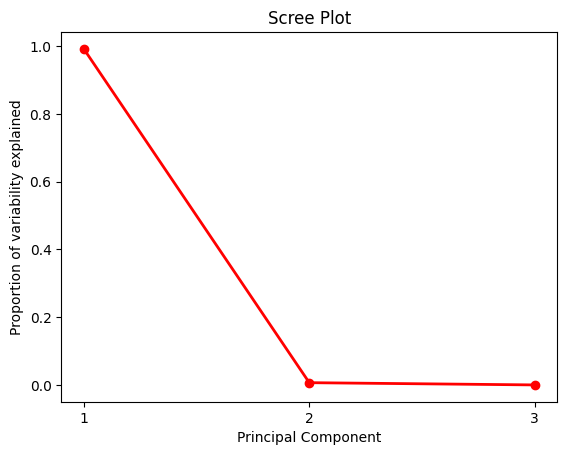

In [ ]:
explained_variance = pca.explained_variance_ratio_ # the ratio is computed based on the sum of the selected eigenvalues

PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, explained_variance, 'ro-', linewidth=2)
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(integer=True)) #Display only integers on the x axis
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of variability explained')
plt.show()

❗Notice that this plot suggests that only one component should be retained. However, as we shall see, this is due to differences in scale (see PCA with standardization).


#### Bi-plot

Next, a **biplot** will be introduced — it shows the position of both data points and variables in the new, lower-dimensional plane.

A 2D biplot consists of a combination of a **scatter plot** (representing the data points) and a **loading plot** (representing the variables), hence the name "biplot" — as it combines two types of plots.

- The **scatter plot** uses the projection scores matrix (as explained earlier) to show the positions of individual data points (rows or observations from the original dataset) in the plane defined by the first two principal components (PCs).
  
- The **loading plot** represents the variables (features) using the principal component loadings (eigenvectors, explained in the previous section). It shows how the original variables relate to the two PCs.

It is important to remember that these two plots represent different spaces:
- The scatter plot corresponds to the **variables space** (showing the position of observations or data points).
- The loading plot corresponds to the **subjects space** (showing the contributions of variables to the principal components).

For further reading on the distinction between the two spaces, refer to this helpful explanation: https://stats.stackexchange.com/questions/192625/data-space-variable-space-observation-space-model-space-e-g-in-linear-regre/192637#192637


##### Bi-plot 1: Scatter plot

   Below is the **scatter plot**. In projecting the scatter plot, there are three options, described in detail here: https://stats.stackexchange.com/questions/141085/positioning-the-arrows-on-a-pca-biplot/141531#141531

   Here we focus on  using a unit-variance normalization: plotting how much of actual distance each point has from the PCs

Below is the projection scores matrix normalized by unit variance. This normalization involves using U (the contribution percentage of each projected point to the square root of the sum of squared distances) and multiplying by n−1 (to obtain the actual proportion of each point relative to the sum of squared distances). Finally, the results are square-rooted (to get the proportion of each point relative to the total distance).


In [ ]:
n = Projections_PCSCORES.shape[0]-1  # Sample size -1 (minus one to have an unbiased estimator or variance)
scores = Projections_PCSCORES[:, :2]/pca.singular_values_[:2]*math.sqrt(n)
print(scores[:10]) #only the first 10 rows are displayed;

[[-1.04374872  0.53314573]
 [-1.14834493  0.61605741]
 [-1.39801785  0.49337752]
 [-1.18986543  0.43072271]
 [-1.10456647  0.67555139]
 [-1.23757494  0.6613001 ]
 [-1.14678062  0.49849842]
 [-1.1488226   1.83201559]
 [-1.24321271 -0.05499697]
 [-1.2340567   0.4079306 ]]


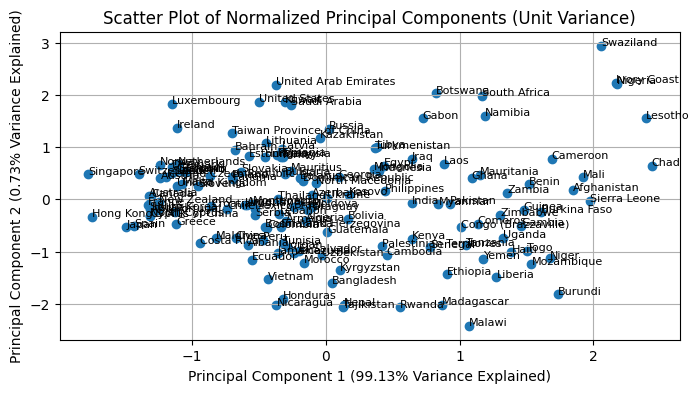

In [ ]:
# Create a DataFrame combining the scores_normalized_variance with country names
df_combined = pd.DataFrame(scores, columns=['Principal Component 1', 'Principal Component 2'])
df_combined['Country'] = Dataset_cleaned['Country name']

# Plot the scatter plot
plt.figure(figsize=(8, 4))
plt.scatter(df_combined['Principal Component 1'], df_combined['Principal Component 2'])

# Annotate each point with the country name
for i, txt in enumerate(df_combined['Country']):
    plt.annotate(txt, (df_combined['Principal Component 1'][i], df_combined['Principal Component 2'][i]), fontsize=8)

# Set the explained variance ratio as xlabel and ylabel
plt.title('Scatter Plot of Normalized Principal Components (Unit Variance)')
plt.xlabel(f'Principal Component 1 ({pca.explained_variance_ratio_[0]*100:.2f}% Variance Explained)')
plt.ylabel(f'Principal Component 2 ({pca.explained_variance_ratio_[1]*100:.2f}% Variance Explained)')
plt.grid(True)
plt.show()


❗Notice that this plot suggests that the Principal Component 1 explains 99.13% variance. However, as we shall see, this is due to differences in scale (see PCA with standardization).


##### Bi-plot 2: Loadings plot

Below is the **loadings plot**. Similar to when projecting the scatter plot, there are three common options for scaling and positioning, which are described in detail here: https://stats.stackexchange.com/questions/141085/positioning-the-arrows-on-a-pca-biplot/141531#141531

Again, we focus on  using a unit-variance normalization: plotting how much of actual distance each point has from the PCs

▶ The loading plot uses the **loadings matrix**.

You can read more about loadings here: https://stats.stackexchange.com/questions/143905/loadings-vs-eigenvectors-in-pca-when-to-use-one-or-another

Algebraically, the loadings matrix represents the original **subject space** (a space where variables are the "points") rotated so that the eigenvectors form the new basis. In this transformed space, the principal components are the axes.

It is important to note that the **variable space** (where data points are the "points") and **subject space** are linked, so the same eigenvectors can be used to describe both.

Statistically, each element in the loadings matrix represents the correlation (or covariance, depending on the scaling) between the original variable and a principal component. This value indicates how strongly the variable is associated with the PC.

The length of a loading vector (for each variable) in the plot reflects how much the variable contributes to that principal component.

This can be thought of as the covariation between the variable and the PC, as the length of the vector is determined by a dot product, which involves the projection of distances between the variable and the PC.

For more details, read: https://stats.stackexchange.com/questions/119746/what-is-the-proper-association-measure-of-a-variable-with-a-pca-component-on-a/119758#119758

In [ ]:
n = Projections_PCSCORES.shape[0]-1 ##sample size - 1 (minus one to have an unbiased estimator or variance)
loadings= pca.components_.T[:, :2]*pca.singular_values_[:2]/math.sqrt(n)
print(loadings)

[[ 1.00327881  0.5794389 ]
 [ 0.08356675  0.0361901 ]
 [ 6.76148779 -0.08664475]
 [ 0.05241747  0.00753721]
 [-0.02459104 -0.01825786]
 [-0.06546894 -0.00978021]]


📔 Note that the sum of the squares of all loadings equals the total variance explained by the two principal components, which is equivalent to the sum of their eigenvalues.

In [ ]:
np.sum(loadings**2)

47.08395972847577

In [ ]:
a = (pca.singular_values_[:2]**2/148)
a.sum()

47.083959728473104

📔Additionally, note that the sum of the loadings for a principal component equals the variance in the dataset explained by that component, which corresponds to its specific eigenvalue.

In [ ]:
sum_of_squared_loadings_pc1 = np.sum(loadings[:, 0]**2)
sum_of_squared_loadings_pc2 = np.sum(loadings[:, 1]**2)

print("Sum of squared loadings for PC1:", sum_of_squared_loadings_pc1)
print("Sum of squared loadings for PC2:", sum_of_squared_loadings_pc2)

Sum of squared loadings for PC1: 46.73890743672013
Sum of squared loadings for PC2: 0.3450522917529694


In [ ]:
pca.singular_values_[:2]**2/148

array([46.73890744,  0.34505229])

Compare the loadings obtained through SVD with those obtained through EVD by multiplying the eigenvector matrix by the square root of the eigenvalues. Again, remember that sign does not matter here.

In [ ]:
pca.components_.T[:, :2]*np.sqrt(pca.explained_variance_[:2])###the latter is the standard deivation

array([[-1.00327881,  0.5794389 ],
       [-0.08356675,  0.0361901 ],
       [-6.76148779, -0.08664475],
       [-0.05241747,  0.00753721],
       [ 0.02459104, -0.01825786],
       [ 0.06546894, -0.00978021]])

Taking this approach to plotting the loadings has the following advantages:

The length of the loading arrows approximates the standard deviation of the original variables. A greater absolute value on the x-axis indicates a higher dispersion of that variable. This is because the length of a vector is the square root of the sum of the squares of its coordinates, and when the variable is centered, these coordinates represent distances from the mean. Hence, this results in the formula for standard deviation.

The scalar products between any two arrows (indicating the similarity of their directions) approximate the covariance between them. Each value of a variable is its distance from the mean due to centering. Therefore, when multiplying these values, we obtain the multiplication of distances from the mean, which equates to the covariance.

The cosines of the angles between the arrows approximate the correlations between the original variables. This is because the cosine involves multiplying the coordinates of the vectors (distances from the mean) and dividing by the product of their lengths (the product of their standard deviations)

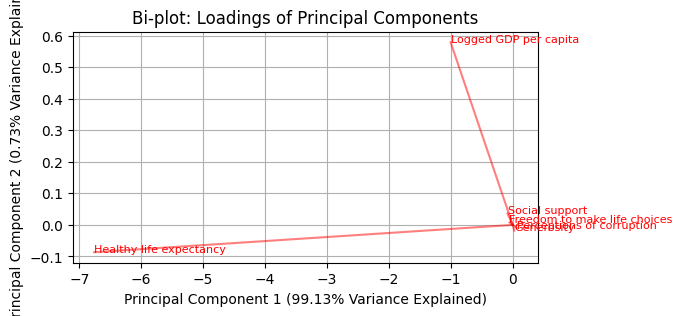

In [ ]:
# Create a DataFrame with loadings and column names
loadings_df = pd.DataFrame(loadings, columns=['PC1', 'PC2'])
loadings_df['Variable'] = Dataset_cleaned.columns[1:]  # Assuming the first column contains country names

# Plot lines for loadings
plt.figure(figsize=(6, 3))
for i, (x, y, var) in loadings_df.iterrows():
    plt.plot([0, x], [0, y], color='r', alpha=0.5)
    plt.text(x, y, var, fontsize=8, color='r')

plt.title('Bi-plot: Loadings of Principal Components')
plt.xlabel(f'Principal Component 1 ({pca.explained_variance_ratio_[0]*100:.2f}% Variance Explained)')
plt.ylabel(f'Principal Component 2 ({pca.explained_variance_ratio_[1]*100:.2f}% Variance Explained)')
plt.grid(True)
plt.show()


Compare the standard deviations below with the lengths of the arrows along the x-axis in the graph above.

In [ ]:
std_devs = Dataset_cleaned.iloc[:, 1:].std()
print(std_devs)

Logged GDP per capita           1.158601
Social support                  0.114889
Healthy life expectancy         6.762043
Freedom to make life choices    0.113332
Generosity                      0.150657
Perceptions of corruption       0.179226
dtype: float64


❗However, the loadings plot is not easily interpretable due to the higher scale range of Health Life Expectancy and Logged GDP per Capita compared to the other variables.

Using a different normalization technique may help improve readability.

Alternatively, standardizing the variables before performing PCA can also enhance the clarity of the plot.

### PCA with standardization

First, standardize the data.

In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
Data_standardized = scaler.fit_transform(Dataset_cleaned.iloc[:, 1:])

Then, apply PCA.

In [8]:
from sklearn.decomposition import PCA
pca_std = PCA(n_components=3)
Projections_PCSCORES_standardized=pca_std.fit_transform(Data_standardized)

Note from the scree plot that the second component now accounts for 20-25% of the variance. Compare this with the scree plot from the unstandardized data.

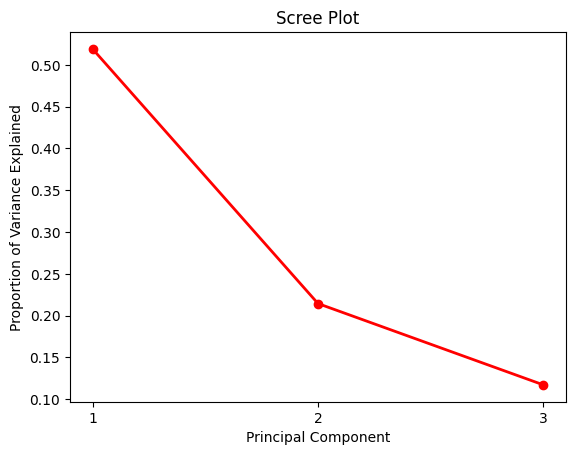

In [9]:
explained_variance_std = pca_std.explained_variance_ratio_

PC_values_std = np.arange(pca_std.n_components_) + 1
plt.plot(PC_values_std, explained_variance_std, 'ro-', linewidth=2)
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(integer=True)) #Display only integers on the x axis
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.show()

Below is the biplot, which combines both the scatter plot and the loadings plot of the standardized dataset, using the same normalization as before (unit variance).

In addition to the similarity of direction approximating the correlation between variables, the values in the loading matrix now also illustrate the correlation of the principal components with the variables.

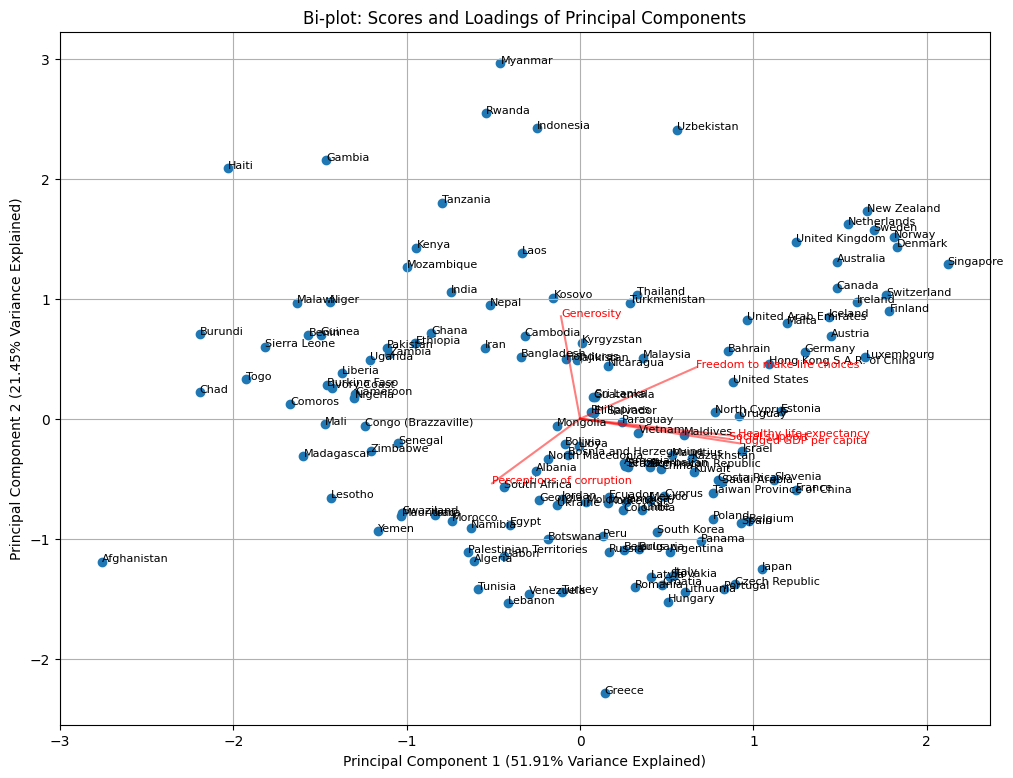

In [10]:
n = Projections_PCSCORES_standardized.shape[0] - 1  # Sample size - 1

# Calculate standardized scores and loadings
scores_normalized_variance_std = Projections_PCSCORES_standardized[:, :2]/pca_std.singular_values_[:2]*math.sqrt(n)
loadings_std = pca_std.components_.T[:, :2] * pca_std.singular_values_[:2] / np.sqrt(n)

# Create a DataFrame combining the scores_normalized_variance with country names
df_combined_std = pd.DataFrame(scores_normalized_variance_std, columns=['Principal Component 1', 'Principal Component 2'])
df_combined_std['Country'] = Dataset_cleaned['Country name']

# Create a DataFrame with loadings and column names
loadings_std_df = pd.DataFrame(loadings_std, columns=['PC1', 'PC2'])
loadings_std_df['Variable'] = Dataset_cleaned.columns[1:]  # Assuming the first column contains country names

# Plot the biplot
plt.figure(figsize=(12, 9))
plt.scatter(df_combined_std['Principal Component 1'], df_combined_std['Principal Component 2'])

# Annotate each point with the country name
for i, txt in enumerate(df_combined_std['Country']):
    plt.annotate(txt, (df_combined_std['Principal Component 1'][i], df_combined_std['Principal Component 2'][i]), fontsize=8)

# Plot lines for loadings
for i, (x, y, var) in loadings_std_df.iterrows():
    plt.plot([0, x], [0, y], color='r', alpha=0.5)
    plt.text(x, y, var, fontsize=8, color='r')

# Set the explained variance ratio as xlabel and ylabel
plt.title('Bi-plot: Scores and Loadings of Principal Components')
plt.xlabel(f'Principal Component 1 ({explained_variance_std[0]*100:.2f}% Variance Explained)')
plt.ylabel(f'Principal Component 2 ({explained_variance_std[1]*100:.2f}% Variance Explained)')
plt.grid(True)
plt.show()


❗In the interpretation of the bi-plot, the directions of the variables is linked to the placement of the points. Here is an intuition regarding the reason: https://stats.stackexchange.com/questions/66926/what-are-the-four-axes-on-pca-biplot/218839#218839 .

Compare for example Netherlands (top right) with Afghanistan (top left).

In [20]:
Dataset_cleaned[Dataset_cleaned['Country name'] == 'Netherlands']

,Country name,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
4,Netherlands,10.932,0.942,72.4,0.913,0.175,0.338


In [23]:
Dataset_cleaned[Dataset_cleaned['Country name'] == 'Afghanistan']

,Country name,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
148,Afghanistan,7.695,0.463,52.493,0.382,-0.102,0.924


❗The loadings plot provides numeric values that indicate the degree to which variables align with the principal components. As shown below, the loadings vary between 0 and 1. These values represent the Pearson correlations between each variable and the principal components (PCs).

We can observe a high correlation of GDP, Social Support, Health Life Expectancy, and Freedom with PC1. This is reflected by the arrows corresponding to these variables (in the biplot) pointing in the same horizontal direction as PC1.

Additionally, note that Perceptions of Corruption have a moderate negative correlation with both principal components. This is visually reflected in the biplot by the arrow corresponding to Perceptions of Corruption pointing in the negative direction for both components.

In [11]:
print(loadings_std_df)

        PC1       PC2                      Variable
0  0.919550 -0.204933         Logged GDP per capita
1  0.860946 -0.168749                Social support
2  0.910540 -0.146559       Healthy life expectancy
3  0.670876  0.429207  Freedom to make life choices
4 -0.110025  0.854039                    Generosity
5 -0.507348 -0.538482     Perceptions of corruption


We might try to build a story using the set of loadings.

Alternatively, we can rotate the loadings until we manage to minimize correlations with some variables while maximizing correlations with others.

